In [1]:
'''
Author: Juarez Monteiro
Dataset: Available in https://www.kaggle.com/abcsds/pokemon
Learning from https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp
'''
print "Let's get our hands dirty."

Let's get our hands dirty.


In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
# Reading the Pokémon dataset
df = pd.read_csv("Pokemon.csv")

In [7]:
# Printing the head and the first 5 rows in the dataset
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [8]:
# Prints some statistical information
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [11]:
# Scikit learn comes with a function that split the dataset for you.

from sklearn.cross_validation import train_test_split

In [14]:
df.columns

Index([u'#', u'Name', u'Type 1', u'Type 2', u'Total', u'HP', u'Attack',
       u'Defense', u'Sp. Atk', u'Sp. Def', u'Speed', u'Generation',
       u'Legendary'],
      dtype='object')

In [16]:
# For this example we gonna try to classify Pokémons by their Type

X = df[['Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]

y = df['Type 1']

In [17]:
# Split arrays or matrices into random train and test subsets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

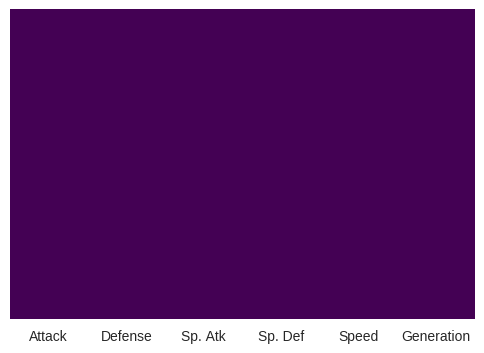

In [32]:
# There ir no empty label :O

sns.heatmap(X_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [36]:
y_test

61     Fighting
799        Fire
747     Psychic
668       Ghost
726       Water
110       Grass
389       Ghost
464    Electric
34       Poison
244       Water
271     Psychic
283       Water
731        Fire
480      Normal
300      Normal
772    Electric
142       Water
256    Fighting
620        Dark
277        Fire
236        Fire
750       Steel
776      Dragon
477       Ghost
289         Bug
665    Electric
586     Psychic
518        Fire
140       Water
478        Dark
         ...   
307         Bug
357     Psychic
296       Grass
513    Electric
232         Bug
499      Ground
713       Water
605         Bug
491      Dragon
299      Normal
37       Poison
97        Water
202       Grass
601         Bug
149        Rock
473       Ghost
191     Psychic
217     Psychic
538     Psychic
744      Normal
54          Bug
447         Bug
350       Water
46       Poison
422       Water
685        Dark
412       Steel
736        Fire
132         Bug
222      Ground
Name: Type 1, dtype: obj

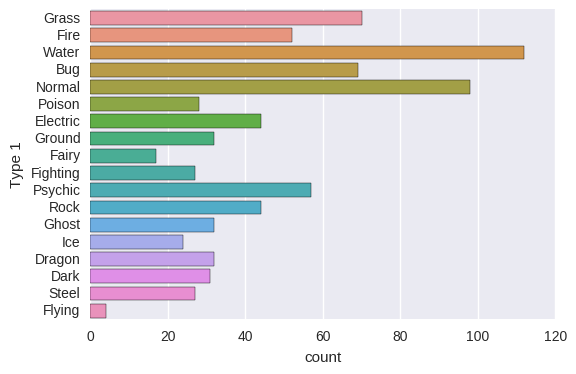

In [51]:
sns.countplot(y='Type 1',data=df)

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
logmodel = LogisticRegression()

In [54]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [55]:
predictions = logmodel.predict(X_test)

In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [63]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

        Bug       0.30      0.14      0.19        22
       Dark       0.00      0.00      0.00        12
     Dragon       0.50      0.09      0.15        11
   Electric       0.00      0.00      0.00        13
      Fairy       0.00      0.00      0.00         1
   Fighting       0.00      0.00      0.00         8
       Fire       0.00      0.00      0.00        16
     Flying       0.00      0.00      0.00         2
      Ghost       0.00      0.00      0.00        12
      Grass       0.43      0.13      0.20        23
     Ground       0.00      0.00      0.00        12
        Ice       0.00      0.00      0.00         8
     Normal       0.23      0.62      0.33        26
     Poison       0.00      0.00      0.00         4
    Psychic       0.19      0.28      0.22        18
       Rock       0.04      0.11      0.06         9
      Steel       0.12      0.10      0.11        10
      Water       0.20      0.52      0.29   

In [64]:
accuracy_score(y_test, predictions)

0.19583333333333333